<a href="https://www.kaggle.com/code/shubkumarop/spaceship-prediction?scriptVersionId=133679349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train_ds=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_ds=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
train_ds.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_ds.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

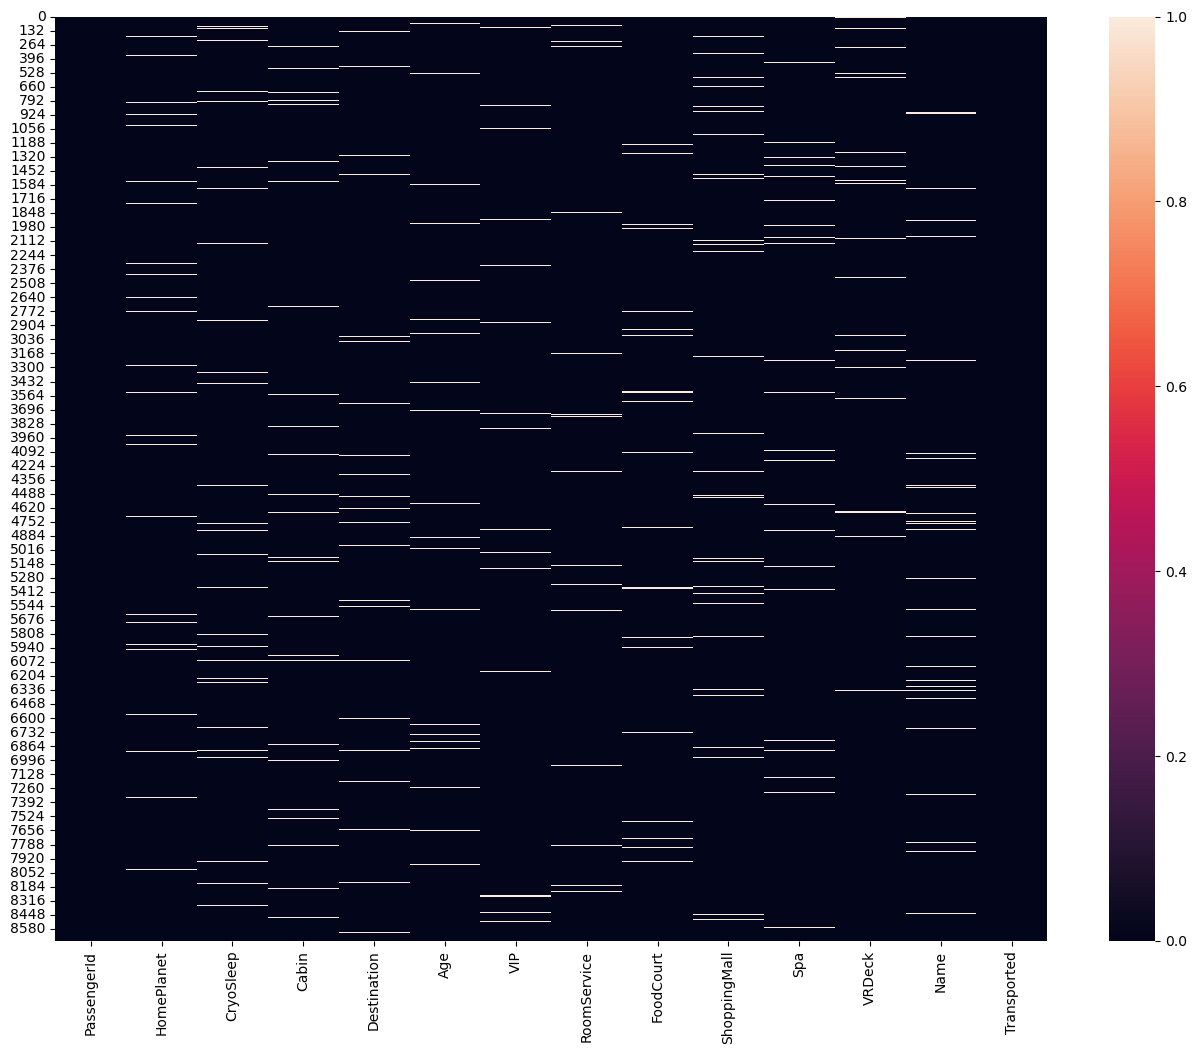

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(train_ds.isnull())

In [8]:
train_ds.drop(['PassengerId','Name','Cabin',],axis=1,inplace=True)
test_ds.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

In [9]:
train_ds.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
train_ds = train_ds.dropna()

In [11]:
train_ds.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
test_ds = test_ds.dropna()

In [13]:
test_ds.shape

(3438, 10)

In [14]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    3438 non-null   object 
 1   CryoSleep     3438 non-null   object 
 2   Destination   3438 non-null   object 
 3   Age           3438 non-null   float64
 4   VIP           3438 non-null   object 
 5   RoomService   3438 non-null   float64
 6   FoodCourt     3438 non-null   float64
 7   ShoppingMall  3438 non-null   float64
 8   Spa           3438 non-null   float64
 9   VRDeck        3438 non-null   float64
dtypes: float64(6), object(4)
memory usage: 295.5+ KB


In [15]:
train_ds['Transported'] = train_ds['Transported'].astype('int')

In [16]:
my_object_df = train_ds.select_dtypes(include=['object'])
my_numeric_df = train_ds.select_dtypes(exclude='object')
df_object_dummies = pd.get_dummies(my_object_df,drop_first=True)
final_train_df = pd.concat([my_numeric_df,df_object_dummies],axis=1)
final_train_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,0,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,0,0,0


In [17]:
my_object_df = test_ds.select_dtypes(include='object')
my_numeric_df = test_ds.select_dtypes(exclude='object')
df_object_dummies = pd.get_dummies(my_object_df,drop_first=True)
final_test_df = pd.concat([my_numeric_df,df_object_dummies],axis=1)
final_test_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,0,0,1,0
4271,40.0,0.0,865.0,0.0,3.0,0.0,0,0,0,0,1,0
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0


In [18]:
train_ds['Transported'] = train_ds['Transported'].astype('int')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [20]:
X=final_train_df.drop('Transported',axis=1)
y=final_train_df[['Transported']]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [22]:
X_train.shape

(5538, 12)

In [23]:
X_test.shape

(1385, 12)

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
model = svm.SVC(kernel='linear')

In [29]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [30]:
X_train_pred = model.predict(X_train)

In [31]:
train_accuracy = accuracy_score(y_train,X_train_pred)
train_accuracy

0.7912603828096786

In [32]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.7855595667870036

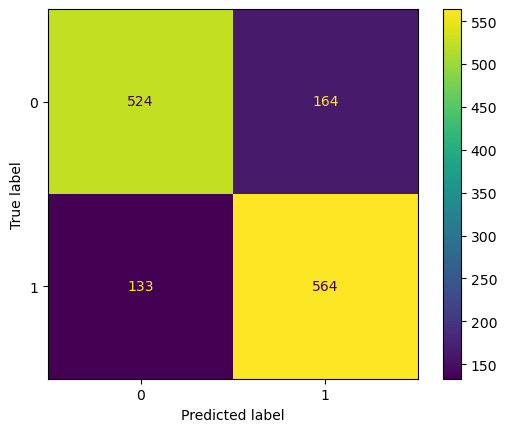

In [33]:
cm = confusion_matrix(y_test, X_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()